In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#天气信息处理 actuel实际气温 average平均气温 temps1 昨天气温，temps2 前天气温 friend 友人猜测气温

In [4]:
features = pd.read_csv('temps0.csv')

In [5]:
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [6]:
print('dimention de données: ',features.shape)

dimention de données:  (348, 12)


In [7]:
#处理时间数据为datetime格式
import datetime

# get year, month, day
years = features['year']
months = features['month']
days = features['day']

# datetime格式
dates = [str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year, month, day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

In [8]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

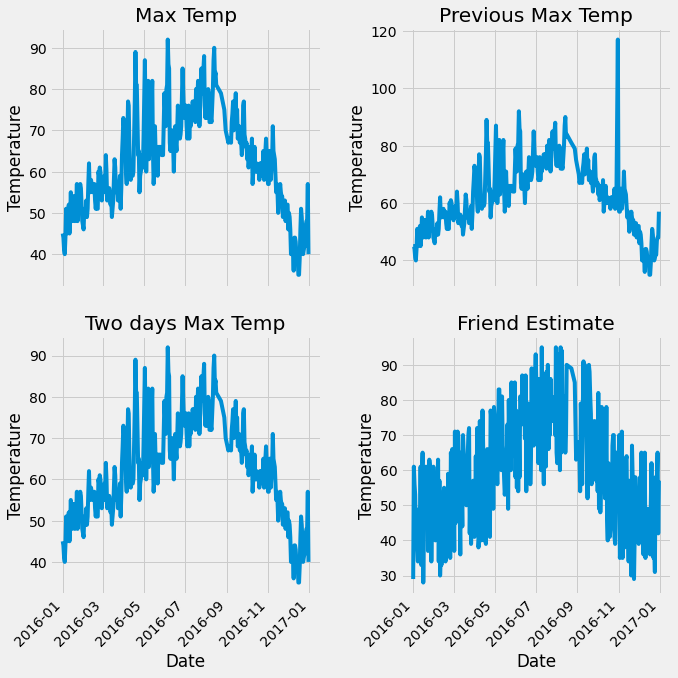

In [9]:
# preparer à designer: show the data, estimate the errors #
# deafalt style

plt.style.use('fivethirtyeight')

# mettre en disposition :2*2 figures

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)


# set label: actuel
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# set label: hier
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')


# set label: avant hier
ax3.plot(dates, features['actual'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two days Max Temp')



# set label: friend
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')


plt.tight_layout(pad=2)





In [10]:
# mettre ligne'week' en 0-1 code (String ne peut pas etre utiliser)

features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [11]:
# 区分x 和 y，y = actual，其余的是x
# set labels (y)
labels = np.array(features['actual'])

# drop labels from eigenvalue (x) (features)

features = features.drop('actual', axis =1)

# enregistrer les noms
feature_list = list(features.columns)

# changer en forme array
features = np.array(features)

In [12]:
features.shape

(348, 17)

In [13]:
# 预处理数据 ，标准化 。。。将40 45 50 与 0 1 数据转化为差距较小数据

from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [14]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.45311448, -1.46252836,
       -1.3470703 , -1.34446055, -1.17460726, -1.4755089 , -1.98891668,
        2.44131112, -0.40482045, -0.40961596, -0.40482045, -0.40482045,
       -0.41913682, -0.40482045])

In [15]:
# activation 激活函数，常用relu
# kernel_initializer,bias_...权重与偏置参数的初始化方法，* 不收敛时可以尝试换一种初始化，玄学...
# kernel_regularizer,bias_.. 要不要加入正则化
# inputs: 输入，可自己指定，也可让网络选
# units: 神经元个数


# 按顺序构造网络模型 input w1 layer1(16 units) w2 layer2(32 units) output(1)

model = tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

In [17]:
# compile 相当于对网络模型进行配置，指定好优化器和损失函数等   *tensorflow官网可查API 稳定版本的tf.keras.optimizers..等


model.compile(optimizer = tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')

# input_features,输入（x)   labels,输出（Y)   validation_split = 0.25,验证集 占0.25    epochs=10,数据集遍历10次    
# batch_size=64 SGD优化器做迭代时，一次迭代64个样本，样本数越多越好

model.fit(input_features, labels, validation_split = 0.25, epochs=10, batch_size=64)

Epoch 1/10
5/5 [==============================] - 0s 31ms/step - loss: 3981.4937 - val_loss: 4321.5293
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 978.5183 - val_loss: 2967.0730
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 913.5948 - val_loss: 2778.7883
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 283.0624 - val_loss: 2549.8909
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 103.4014 - val_loss: 1794.1398
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 393.8716 - val_loss: 2436.9377
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 111.0191 - val_loss: 1803.3635
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 154.4988 - val_loss: 1868.8868
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 207.7135 - val_loss: 1240.9540
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 336.7474 - val_los

In [18]:
# 模型未完全收敛，调整参数

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [19]:
input_features.shape  # Param : 17*16+16 (w1 + b1)

(348, 17)

In [20]:
# 重新构造网络模型 更换初始化方法，非默认的, kernel_initializer = 'random_normal' 随机的高斯分布 Loi Normal

model = tf.keras.Sequential()
model.add(layers.Dense(16, kernel_initializer = 'random_normal'))
model.add(layers.Dense(32, kernel_initializer = 'random_normal'))
model.add(layers.Dense(1, kernel_initializer = 'random_normal'))

In [21]:
model.compile(optimizer = tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')

model.fit(input_features, labels, validation_split = 0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 23ms/step - loss: 4390.3022 - val_loss: 2868.7332
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 4292.5728 - val_loss: 2784.9133
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 4167.1572 - val_loss: 2669.2610
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 3863.9861 - val_loss: 2557.1311
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 2116.6304 - val_loss: 2834.7930
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 164.7612 - val_loss: 1964.2961
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 272.7839 - val_loss: 1001.5741
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 212.8620 - val_loss: 1235.6592
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 80.8075 - val_loss: 1208.2491
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 101.5

In [22]:
# 重新构造网络模型 加入正则化惩罚项  loss: 40.8379 - val_loss: 39.2033 趋近相等，即收敛（结果反向增大即为过拟合）（实际操作调参可以参考论文...

model = tf.keras.Sequential()
model.add(layers.Dense(16, kernel_initializer = 'random_normal',kernel_regularizer=tf.keras.regularizers.12(0.03)))
model.add(layers.Dense(32, kernel_initializer = 'random_normal',kernel_regularizer=tf.keras.regularizers.12(0.03)))
model.add(layers.Dense(1, kernel_initializer = 'random_normal',kernel_regularizer=tf.keras.regularizers.12(0.03)))

In [21]:
model.compile(optimizer = tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')

model.fit(input_features, labels, validation_split = 0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 26ms/step - loss: 4390.1943 - val_loss: 2870.5291
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 4294.5640 - val_loss: 2788.8201
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 4173.8750 - val_loss: 2675.0657
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 3939.3438 - val_loss: 2491.4397
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 2643.9802 - val_loss: 2967.6917
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 140.2849 - val_loss: 2469.5337
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 205.6189 - val_loss: 971.3735
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 486.9966 - val_loss: 1256.3822
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 80.8312 - val_loss: 1273.9662
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 249.86

In [23]:
# 预测模型结果 model has all the W and b , input x ,then have y

predict = model.predict(input_features)
predict.shape

In [24]:
# 测试模型结果，展示

# 转换日期格式
dates = [str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year, month, day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

# 创建表格存日期和其对应的标签数值

true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})


# 创建表格存日期和其对应的模型预测数值

months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-'+ str(int(month))+ '-'+ str(int(day)) for year, month, day in zip(years, months, days)]


test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]


predictions_data = pd.DataFramedata = {'data': test_dates,'prediction': predict.reshape(-1)}



In [ ]:
#Real

plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

#Predire
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation='60');
plt.ledend()

#picture name
plt.xlabel('Date'); plt.ylabel('Max Temperaure (F)'); plt.title('Actual and Predicted Values');


